# Chapter 1 - Data Exploration & Data Visualisation

This chapter is the first step in understanding the Car Sales Industry within Maryland. The components of the database schema are going to be explored. Understanding how these values have changed over time will lay a good foundation for the seasonality exploration that will take place in chapter 2. This chapter is focused on visualisation which focuses on identifying overall trends and gaining an understanding of any underlying patterns.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [17]:
#Load in the datasets that have been joined in SQL so that all variables have been included
monthly_sales = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/monthly_car_sales_all_data.csv')
monthly_sales['month']= pd.to_datetime(monthly_sales['month'])
monthly_sales['incrementing_month'] = range(1,len(monthly_sales)+1)
monthly_sales

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,month,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,incrementing_month
0,31106,49927,755015820,386481929,2002-01-01,81033,1141497749,2.6,5.5,5.0,1
1,27520,50982,664454223,361353242,2002-02-01,78502,1025807465,2.6,5.2,5.0,2
2,34225,58794,805666244,419385387,2002-03-01,93019,1225051631,2.4,5.1,5.0,3
3,36452,59817,846368297,433061150,2002-04-01,96269,1279429447,2.5,4.9,4.9,4
4,37359,60577,855005784,442569410,2002-05-01,97936,1297575194,2.5,4.7,4.9,5
...,...,...,...,...,...,...,...,...,...,...,...
258,26360,49502,1196918451,887723892,2023-07-01,75862,2084642343,4.7,1.7,1.8,259
259,25876,52725,1222581892,908454060,2023-08-01,78601,2131035952,4.3,1.8,1.7,260
260,23892,45386,1134437699,744676584,2023-09-01,69278,1879114283,4.1,1.8,1.6,261
261,23775,45473,1122680147,740582533,2023-10-01,69248,1863262680,4.0,2.1,1.7,262


The data that has been loaded in is the monthly car sales data that combines economic, socioeconomic data and yearly car sales data into one large table. Using Pandas you are able to select certain columns to graph. As this section is going to use a lot of scatter plots / line graphs, multiple functions need to be created to reduce the repeated code when graphing data. You can view the functions below.

### Function creation

In [18]:
#Create a function called 'scatterplot' which can be done for simple Time Series Graphs with a line connecting each point
def scatterplot(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [19]:
#Create a function for line time series
def line_series(x,y,title,xlabel,ylabel):
    plt.figure(figsize=(12,8))
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [20]:
#Create a function that plots multiple lines
def plot_multiple_series_xvalues(xvalues,yvalues,labels,title,xlabel,ylabel):
    plt.figure(figsize=(14,8))
    for i in range(len(labels)):
        plt.plot(xvalues[i], yvalues[i], label=labels[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
def create_monthly_data_years_as_columns(df, value_column, incrementing_month):

    # Create list of months
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    original_copy = df.copy()
    original_copy['Incrementing Month'] = range(1, len(original_copy) + 1)
    original_copy.set_index(incrementing_month, inplace=True)

    # Determine the number of years
    num_years = (len(df) + 11) // 12

    # Create a new dataframe where the index is the number of months and the columns are the years
    monthly_data = pd.DataFrame(index=months, columns=range(1, num_years + 1))

    # Fill the empty dataframe
    for i, row in original_copy.iterrows():
        year = (i - 1) // 12
        month = months[(i - 1) % 12]
        monthly_data.at[month, year + 1] = row[value_column]

    return monthly_data

In [22]:
def plot_roll_mean(df_column,window,title):

    #Look at the mean of the data
    rolmean = df_column.rolling(window).mean()

    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)

In [23]:
#Create a function for a least squares line

#Import the neccessary packages
from sklearn.linear_model import LinearRegression

def least_squares_line(incrementing_value,y_value,title,xlabel,ylabel):
    plt.figure(figsize=(12,8))

    #Create the x and y values for the least squares lines
    x_trend_least_squares = incrementing_value.values.reshape(-1,1).astype(float)
    y_trend_least_squares = y_value.astype(float) 

    #Train the model using linear regression packagage
    model = LinearRegression()

    #Fit the model to the x and y values
    model.fit(x_trend_least_squares,y_trend_least_squares)

    #Create the y values for the least squares
    y_pred = model.predict(x_trend_least_squares)

    plt.scatter(x_trend_least_squares, y_trend_least_squares, label='original data', color='blue')
    plt.plot(x_trend_least_squares, y_pred, label='least squares', color='red')

    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    #Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept

In [24]:
#Create a function for finding the line of best fit in between two data points
def find_line_of_best_fit_period(time_series, time_period1, time_period2):
    
    time_series = time_series[time_period1:time_period2]

    # Prepare the time data
    time = np.arange(len(time_series)).reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the data
    model.fit(time, time_series)
    
    # Get the slope (m) and y-intercept (b)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return slope, intercept

In [25]:
#Create a function that takes number of years as a time series and converts it to an incrementing year value
def year_column_creation(df, time_series_date):
    """
    Create an incrementing year count columns

    Parameters:
    df: is the dataframe that is going to have the new column added to
    time_series_date is the date column in the dataframe
    """
    
    df['year_count'] = pd.to_datetime(time_series_date) #create column 'year_count' from dates of time series
    first_year_index = 0 
    offsets = (df['year_count'] - df['year_count'][first_year_index]).dt.years #calculate the months offset
    start_date = df['year_count'].iloc[0] 
    df['year_count'] = pd.date_range(start=start_date, periods=len(df['year_count']),freq='Y') #create an incrementing count
    df['year_count'] = offsets

    return df['year_count']

In [26]:
def normalize_data(df_series):

    # Find minimum and maximum values in the specified column
    min_val = df_series.min()
    max_val = df_series.max()

    # Normalize the specified column
    normalized_series = (df_series - min_val) / (max_val - min_val)

    return normalized_series

In [27]:
#Include parallel lines which suggest when covid-19 and the global financial crises took place
#Creating a deeper understanding of their direct impact

def plot_with_annotated_dates(xvalues, yvalues, events_list, date_of_events_list, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.plot(xvalues, yvalues, label='Monthly Cars Sold')
    
    # Convert date_of_events_list to datetime
    date_of_events_list = pd.to_datetime(date_of_events_list)
    
    for event, date in zip(events_list, date_of_events_list):
        plt.axvline(x=date, color='orange', linestyle='--', label=event)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


### Monthly Cars Sold in Maryland Analysis

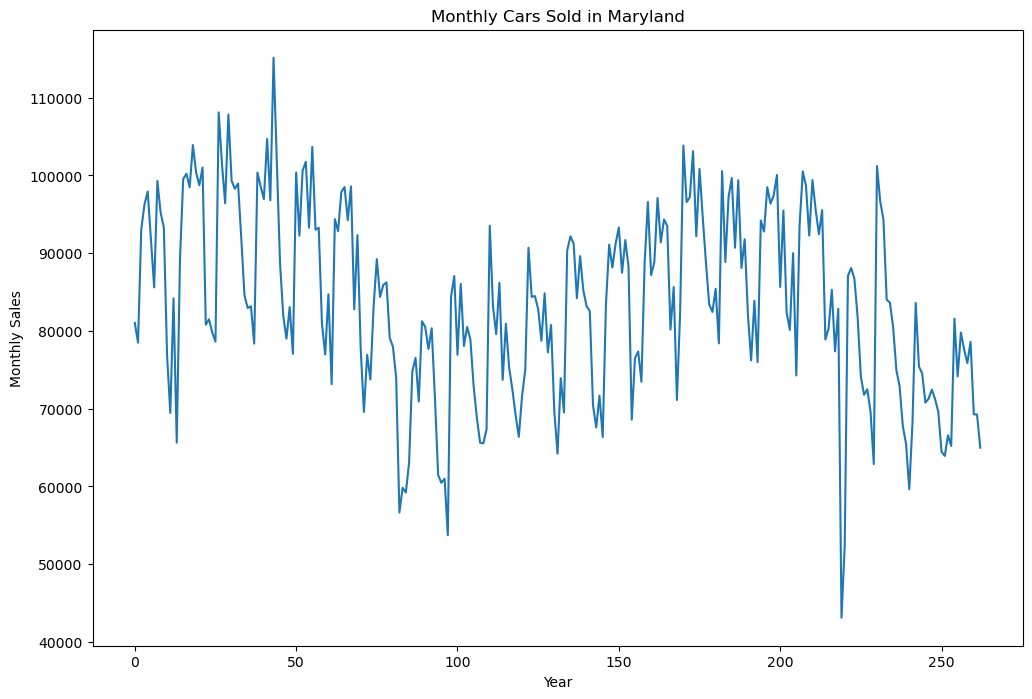

In [28]:
#Create a plot of monthly sales in Maryland
line_series(monthly_sales.index,monthly_sales['total_cars_sold'], 'Monthly Cars Sold in Maryland', 'Year','Monthly Sales')

The time series represents the combination of Used Cars Sold and New Cars Sold as a singular variable, Cars Sold. This creates a graph that encapsulates the number of cars sold in each month from 2002-2023. There is a steady decline in number of cars sold from 2002-2023 with the major fluctuation periods being observed around 2008 and 2020.

#### Statistical Analysis of Number of Cars Sold
By segmenting the data into years it allows for clustering where movements within the year can be identified using clustering techniques

In [29]:
#Transform dataframe with each year as a column with the months as rows
year_to_year_sales =  create_monthly_data_years_as_columns(monthly_sales,'total_cars_sold','incrementing_month')
year_to_year_sales

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
January,81033,84188,79788,83171,83076,84707,76929,59217,61007,65531,...,71679,77354,71120,85410,83883,89997,85281,69608,59657,66580
February,78502,65633,78622,78373,77060,73153,73756,63087,53741,67327,...,66356,73468,82441,78402,75987,74272,77376,62885,68211,65213
March,93019,89218,108106,100365,100372,94375,83096,74792,84430,93524,...,83333,88774,103838,100555,94202,93507,82836,101204,83601,81580
April,96269,99538,101537,98586,92247,92833,89237,76536,87073,83166,...,91097,96590,96580,88875,92776,100513,43120,96661,75426,74148
May,97936,100214,96408,96956,100611,97875,84374,70930,76931,79599,...,88153,87189,97184,97227,98482,98638,52407,94339,74535,79788
June,91763,98477,107831,104695,101757,98508,85912,81241,86042,86187,...,91239,88819,103116,99662,96379,92264,87099,84017,70783,77614
July,85602,103899,99323,96794,93273,94250,86243,80529,78070,73703,...,93300,97099,92181,90703,97459,99398,88095,83638,71296,75862
August,99275,100385,98281,115136,103667,98596,79121,77683,80517,80930,...,87499,91393,100832,99381,100055,95558,86700,80513,72455,78601
September,95225,98743,98950,101850,93018,82789,77957,80353,78891,75334,...,91692,94336,94600,88100,85663,92437,81768,74979,71239,69278
October,93296,101014,91885,88759,93279,92313,73943,71500,72914,72493,...,88264,93506,88760,91803,95482,95548,74105,72888,69580,69248


In [39]:
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [48]:
# Transpose the DataFrame
df_transposed = year_to_year_sales.T

# Convert DataFrame to NumPy array
sales_array = df_transposed.to_numpy()

# Reshape the array into shape [22, 12, 1]
sales_data_3d = sales_array.reshape(22, 12, 1)

In [49]:
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset('Trace')

In [50]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

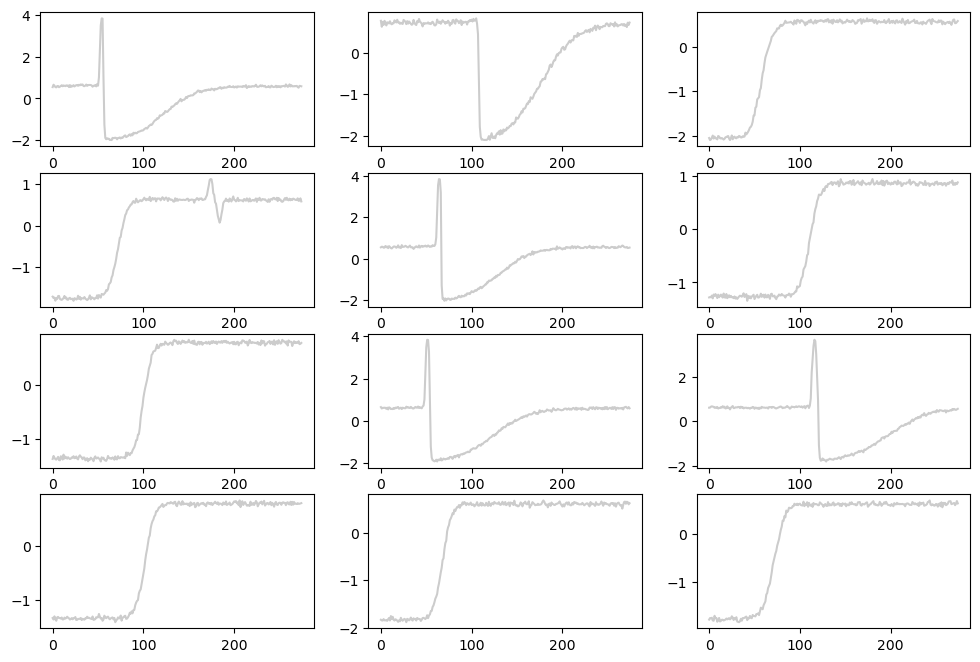

In [51]:
for yi in range(12):
    plt.subplot(4,3,yi+1)
    plt.plot(X_train[yi].ravel(),'k-',alpha=0.2)

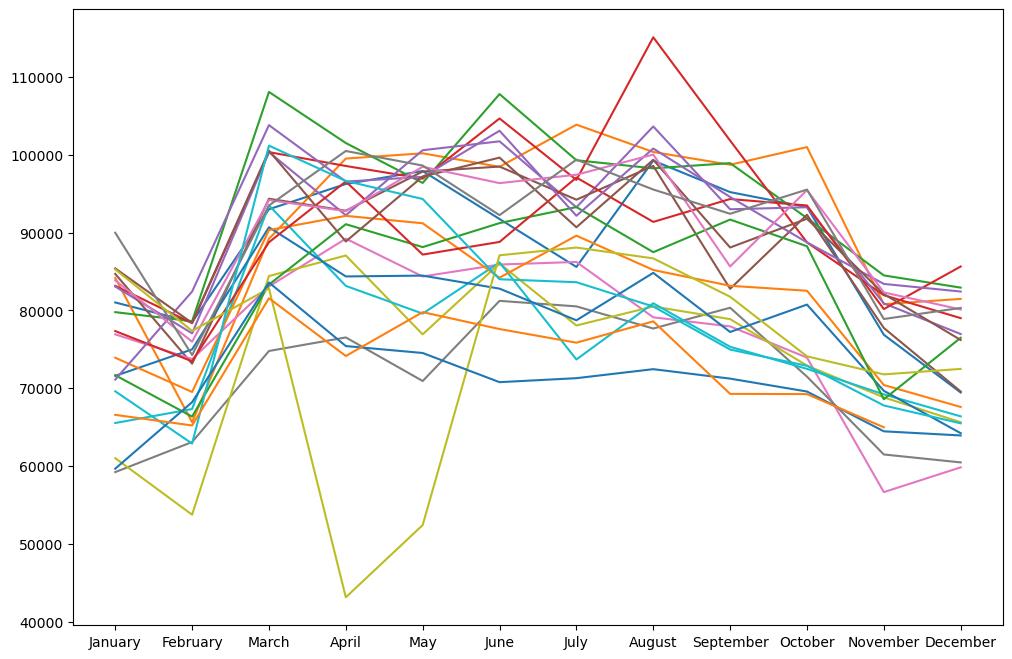

In [31]:
plt.plot(year_to_year_sales)

#### Introduction to Economic Events

The analysis of car sales trends in Maryland from 2002 to 2023 reveals significant fluctuations, some of which coincide with major economic events. Two notable events are the Global Financial Crisis of 2007-2009 and the COVID-19 pandemic of 2020-2023. (For more information please refer to ___)


#### How Global Financial Events impacted Numbers of Cars Sold

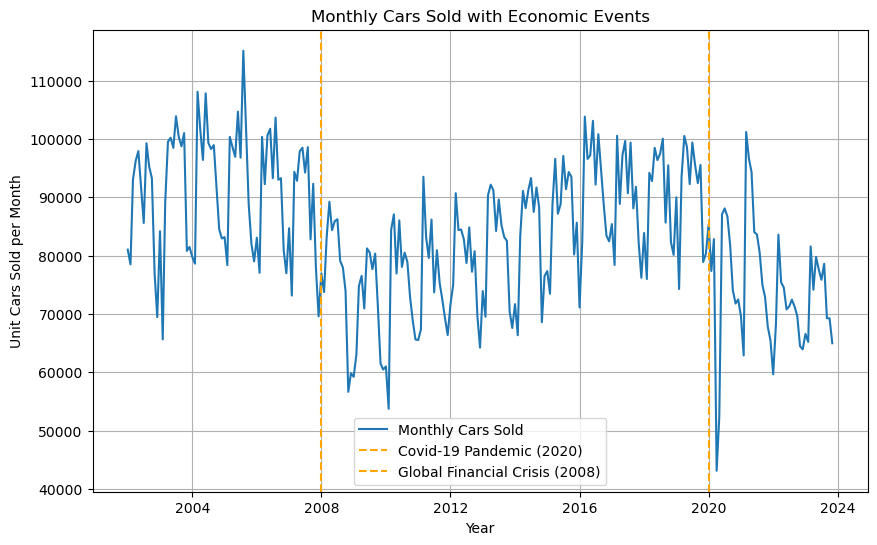

In [32]:
#To articulate the impacts of global economic events on the number of cars sold incorporate vertical lines 
#The below code is the graph to create this

plot_with_annotated_dates(monthly_sales['month'],monthly_sales['total_cars_sold'],['Covid-19 Pandemic (2020)','Global Financial Crisis (2008)'],['2020-01-01','2008-01-01'],'Year','Unit Cars Sold per Month','Monthly Cars Sold with Economic Events')

Observe the changes that take place following the Global Financial Crisis (GFC) and the Covid-19 Pandemic. The consequences are different in variation but the pattern for both are an overall negative impact on the number of cars sold.

Question: How did GFC and Covid-19 Impact Number of Cars Sold

### Monthly Value of Cars Sold in Maryland Analysis
Observe how the monthly value of cars sold in Maryland has changed in the same time period that number of cars sold was collected. 

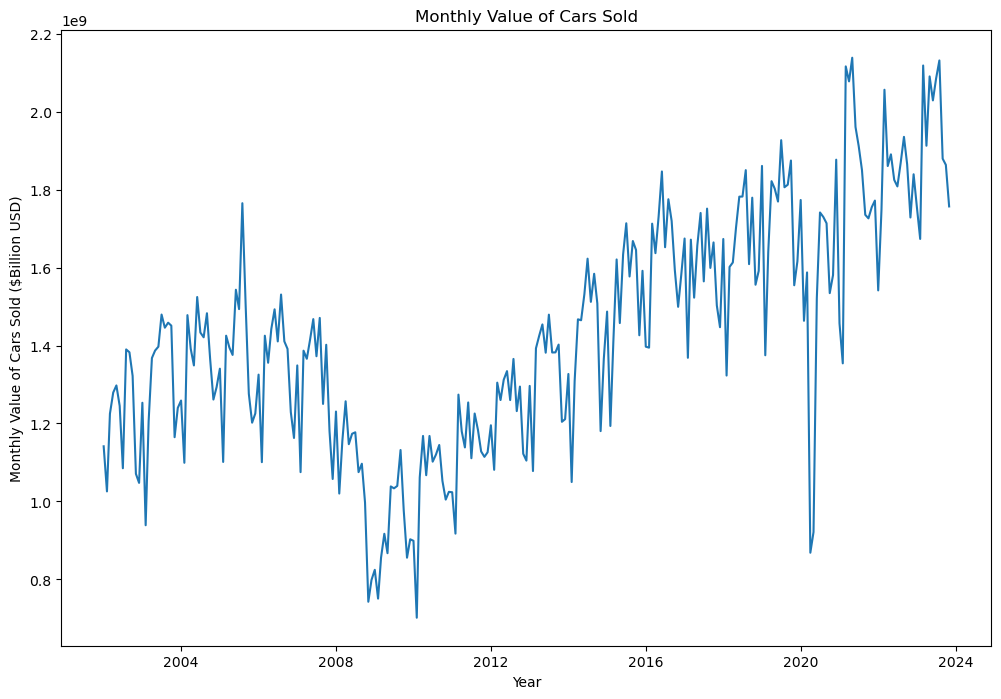

In [33]:
#Plot monthly value of cars sold
line_series(monthly_sales['month'],monthly_sales['total_value_cars_sold'],'Monthly Value of Cars Sold','Year','Monthly Value of Cars Sold ($Billion USD)')

The value of cars sold has a decrease in 2008 but there is a steady growth continuing in 2023 with some irregularities that take place in 2020. This is quite different to what was observed with the total number of cars sold.

### Comparison of Number of Cars Sold vs Value of Cars Sold
Understanding how the movement of these two is fundamental to forming questions about the automotive industry.

In [34]:
#As the comparison is looking at the overall trend smooth the data before normalisation

#Find smoothing of total cars sold
smoothed_total_cars_sold = monthly_sales['total_cars_sold'].rolling(12).mean()

#Find smoothing of total value of cars sold
smoothed_total_value_cars_sold = monthly_sales['total_value_cars_sold'].rolling(12).mean()

In [35]:
#Normalise both number of cars sold and value of cars sold so that they can be plotted

#Normalise number of cars sold
normalised_total_cars_sold = normalize_data(smoothed_total_cars_sold)

#Normalise value of cars sold
normalised_total_value_cars_sold = normalize_data(smoothed_total_value_cars_sold)

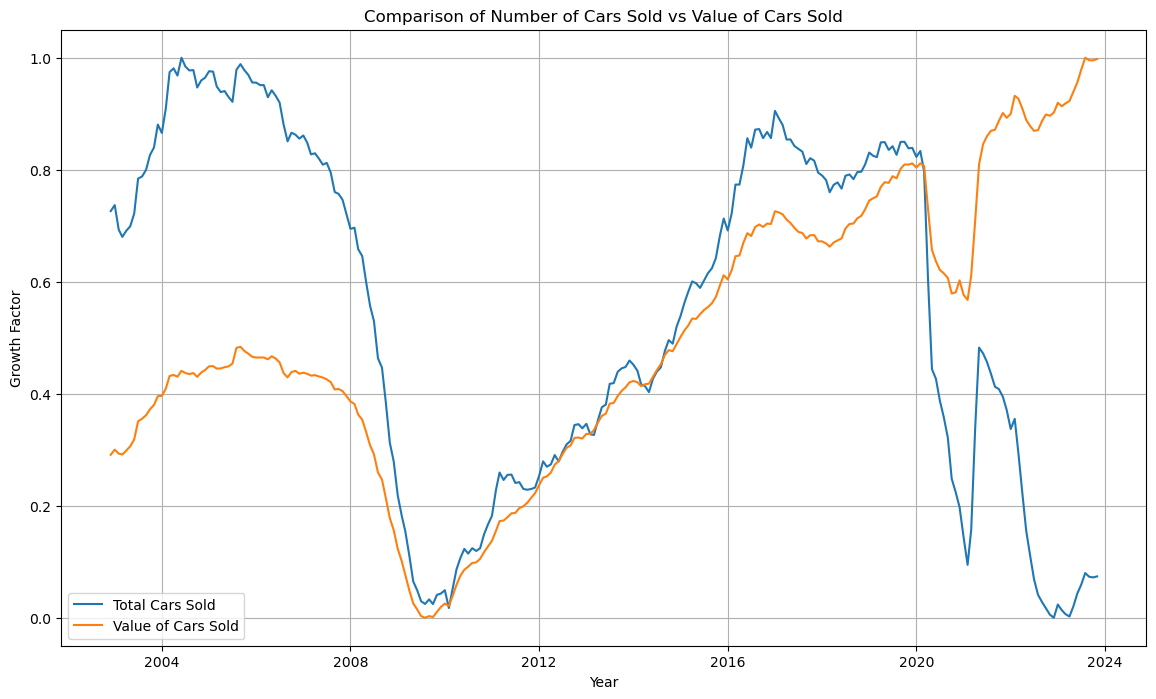

In [36]:
#plot the normalised data which has values falling between 0 and 1
plot_multiple_series_xvalues([monthly_sales['month'],monthly_sales['month']],[normalised_total_cars_sold,normalised_total_value_cars_sold],['Total Cars Sold','Value of Cars Sold'],'Comparison of Number of Cars Sold vs Value of Cars Sold','Year','Growth Factor')

Observe that the number of cars sold and the value of cars sold follow a very similar pattern until there is a change that takes place in 2020. There is a continued growth in value of cars sold however, there is a drop in the number of cars sold.

Question: What happened in 2020 that made the number of cars sold decrease to record lows, while the value of cars sold went to record highs.

#### Line of Best Fit
Finding the line of best fit is going to represent the overall trend which minimses the amount of movement above and beyond a linear line. 

In [37]:
#Turn the time series data into incrementing months so that you can perform linear regression on the data
monthly_sales_expanded_dropped_na = monthly_sales_expanded.copy()
monthly_sales_expanded_dropped_na.dropna(inplace=True)
monthly_sales_expanded_dropped_na.reset_index(inplace=True)
convert_to_incrementing_months(monthly_sales_expanded_dropped_na,'month')

NameError: name 'monthly_sales_expanded' is not defined

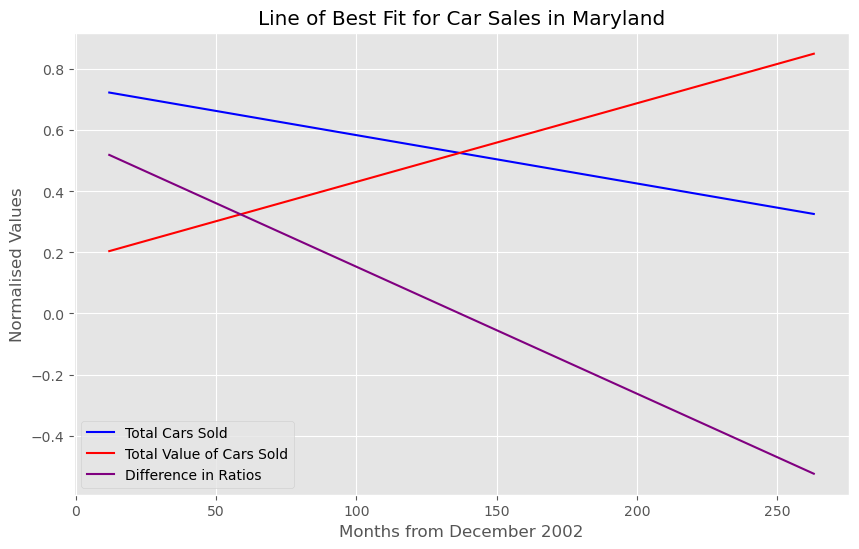

In [ ]:
#Find the line of best fit
plt.figure(figsize=(10,6))
total_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'])
total_value_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'])
cars_sold_value_cars_sold_difference_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['difference_normalised_yearly_rolling_mean'])

#Plot the line of best fits
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],total_cars_sold_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + total_cars_sold_ratios_lbf[1],color='blue',label='Total Cars Sold')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],total_value_cars_sold_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + total_value_cars_sold_ratios_lbf[1],color='red',label='Total Value of Cars Sold')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],cars_sold_value_cars_sold_difference_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + cars_sold_value_cars_sold_difference_ratios_lbf[1],color='purple', label='Difference in Ratios')
plt.title('Line of Best Fit for Car Sales in Maryland')
plt.xlabel('Months from December 2002')
plt.ylabel('Normalised Values')
plt.legend()

In [ ]:
ratios_car_sales_lbf = pd.DataFrame()
row_names = ['Total Cars Sold', 'Total Value of Cars Sold', 'Difference in Ratios']
#Find the yearly slope (multiply the monthly slope by 12)
ratios_car_sales_lbf['Slope'] = [total_cars_sold_ratios_lbf[0]*12,total_value_cars_sold_ratios_lbf[0]*12, cars_sold_value_cars_sold_difference_ratios_lbf[0]*12]
ratios_car_sales_lbf['Intercept'] = [total_cars_sold_ratios_lbf[1], total_value_cars_sold_ratios_lbf[1], cars_sold_value_cars_sold_difference_ratios_lbf[1]]
ratios_car_sales_lbf = ratios_car_sales_lbf.rename(index=dict(zip(ratios_car_sales_lbf.index, row_names)))
ratios_car_sales_lbf

,Slope,Intercept
Total Cars Sold,-0.019018,0.742890
Total Value of Cars Sold,0.030919,0.173391
Difference in Ratios,-0.049937,0.569499


Having the lines of best fit by themselves on the graph, is the best way to isolate and understand the linear trends. The slope values of cars sold is negative (-0.019018) while the value of cars sold is positive (0.030919) which suggests that value of cars sold is increasing about 50% faster than the total cars sold is decreasing. Which is resulting in a 0.05 decrement for each passing month.

### Understanding the difference in Number of Cars Sold and Value of Cars Sold

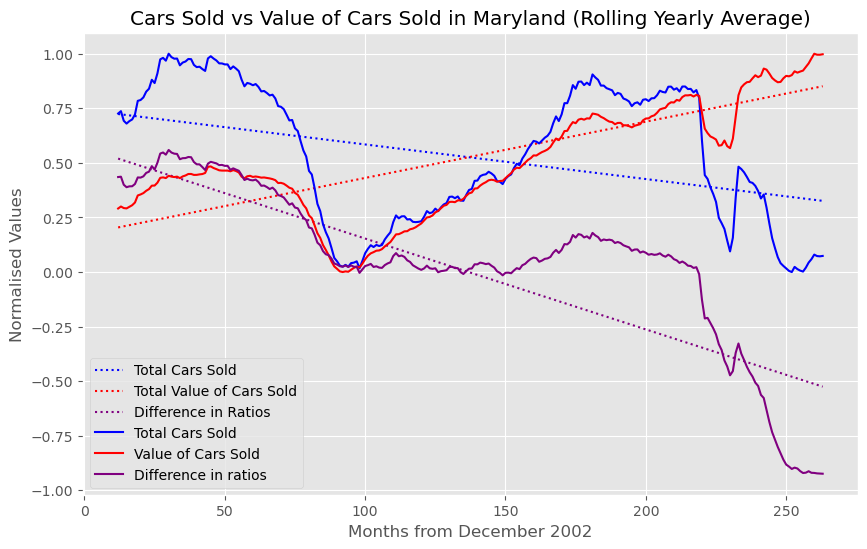

In [ ]:
#Find the line of best fit
plt.figure(figsize=(10,6))
total_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'])
total_value_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'])
cars_sold_value_cars_sold_difference_ratios_lbf = find_line_of_best_fit(monthly_sales_expanded_dropped_na['difference_normalised_yearly_rolling_mean'])

#Plot the line of best fits
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],total_cars_sold_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + total_cars_sold_ratios_lbf[1],color='blue',label='Total Cars Sold',linestyle='dotted')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],total_value_cars_sold_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + total_value_cars_sold_ratios_lbf[1],color='red',label='Total Value of Cars Sold',linestyle='dotted')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],cars_sold_value_cars_sold_difference_ratios_lbf[0]*monthly_sales_expanded_dropped_na['incrementing_months'] + cars_sold_value_cars_sold_difference_ratios_lbf[1],color='purple', label='Difference in Ratios',linestyle='dotted')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'], monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'], color = 'b', label='Total Cars Sold')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'], monthly_sales_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'], color = 'r', label='Value of Cars Sold')
plt.plot(monthly_sales_expanded_dropped_na['incrementing_months'],monthly_sales_expanded_dropped_na['difference_normalised_yearly_rolling_mean'],color = 'purple', label='Difference in ratios')
plt.title('Cars Sold vs Value of Cars Sold in Maryland (Rolling Yearly Average)')
plt.xlabel('Months from December 2002')
plt.ylabel('Normalised Values')
plt.legend()

The two major insights from the EDA above are
1. Impact of Global Economic Events: The analysis reveals that significant global economic events, such as the Global Financial Crisis (GFC) and the COVID-19 pandemic, have had adverse effects on the automotive industry. These events coincide with downturns in both the number of cars sold and the value of cars sold, indicating the vulnerability of the industry to macroeconomic shocks.

2. Shift in Sales Dynamics: Another key insight is the observed trend over the past two decades, showing a relative decrease in the number of cars sold compared to the value of cars sold. This shift suggests changes in consumer preferences, purchasing behavior, or market dynamics that have led to a greater emphasis on higher-value vehicles or increased pricing of cars over time.

Questions:

1. Why did the number of cars sold decrease but the value of cars sold increased?

2. Why was the market response to the GFC so different to the COVID-19 Pandemic?

### Average Transaction Value Per Car in Maryland
The average transaction value is calculated by taking the value of cars sold and dividing that by the number of cars sold. This will give an average price across the month of the average value of transactions. This is somewhat reflective of what you could assume is the average price of a car but you cannot say that for certain, that this metric is what represents that.

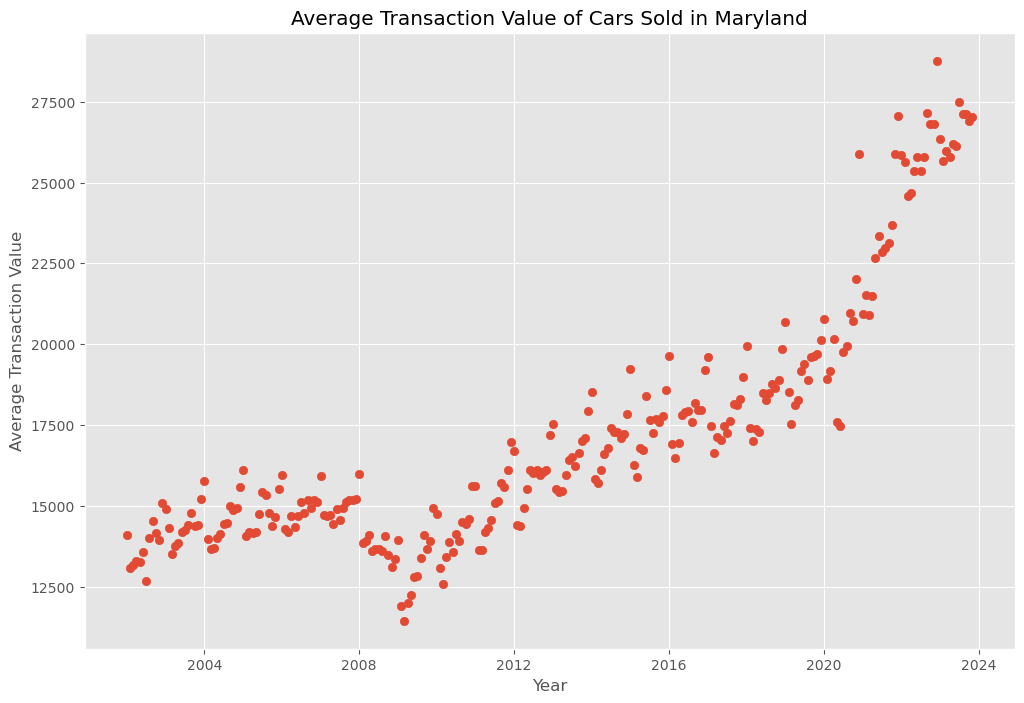

In [ ]:
#Create a new column in the table that is called 'average_transaction_value' 
#Take the total_value_cars_sold series / total_cars_sold and this will create the average price per month
monthly_sales_expanded['average_transaction_value'] = monthly_sales_expanded['total_value_cars_sold'] / monthly_sales_expanded['total_cars_sold']
scatterplot(monthly_sales_expanded.index,monthly_sales_expanded['average_transaction_value'],'Average Transaction Value of Cars Sold in Maryland','Year','Average Transaction Value')

There is a general trend that takes place from 2002 to 2020 where besides a small dip due to the GFC, the Average Transaction Value increases. Until Covid-19 had its impact on global economies and resulted in the average transaction value to sky rocket and show a much greater growth rate.

### Bivariate Analysis
Total cars sold and value of cars sold has been explored and there is a clear difference. The next step is to look at other relationships between other variables. This will be important to understand what to include in the analysis. Using a correlation matrix to explore the relationship between different varibles can help to understand the data. At this point yearly data which has far more variables is also going to be explored.

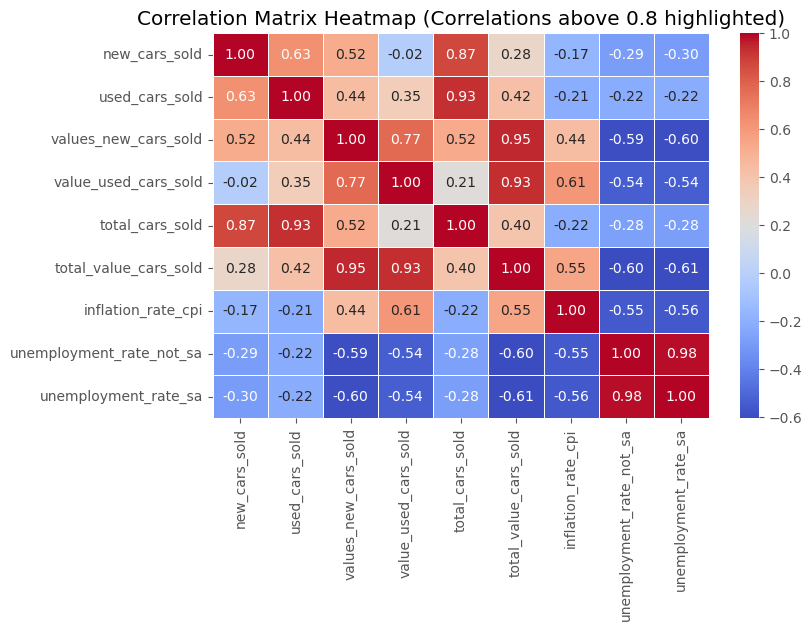

In [ ]:
#Create a heat map correlation matrix to understand which variables are related to one another. 
#This can be done for dimensionality reduction
plt.figure(figsize=(8, 5))
monthly_matrix = monthly_sales.corr()

sns.heatmap(monthly_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Correlations above 0.8 highlighted)')
plt.show()

The monthly correlation matrix can be used to understand which variables are highly related to one another. Once this is understood, it can assumed that there will be a similar impact of one variable on another. The columns below have at least 0.8 as their correlation

1. Unemployment Rate Seasonally Adjusted and Not Seasonally Adjusted 
2. Total Cars Sold & Used/New Cars Sold 
3. Total Value Cars Sold & Value Used/New Cars Sold

In [ ]:
#Import the yearly data and print some of the data
yearly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/yearly_car_sales_all_data.csv')
yearly_data.head(5)

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,maryland_population,total_workforce,year,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold
0,39382,217837100000,2.4,757,95589510000,5440389,2427396,2002-01-01,402164,656089,9572554876,4940209772,1058253,14512764648
1,40686,228959300000,1.4,782,99039956000,5496269,2434480,2003-01-01,428252,675358,10623148339,5166071497,1103610,15789219836
2,42579,245124500000,1.8,819,104716511000,5546935,2461074,2004-01-01,428508,699677,10972956024,5385548947,1128185,16358504971
3,44368,262100000000,2.2,853,110807924000,5592379,2497416,2005-01-01,421834,703835,11006733922,5639803515,1125669,16646537437
4,46162,274145300000,2.5,888,116791342000,5627367,2530129,2006-01-01,399282,696968,10411657206,5865687318,1096250,16277344524


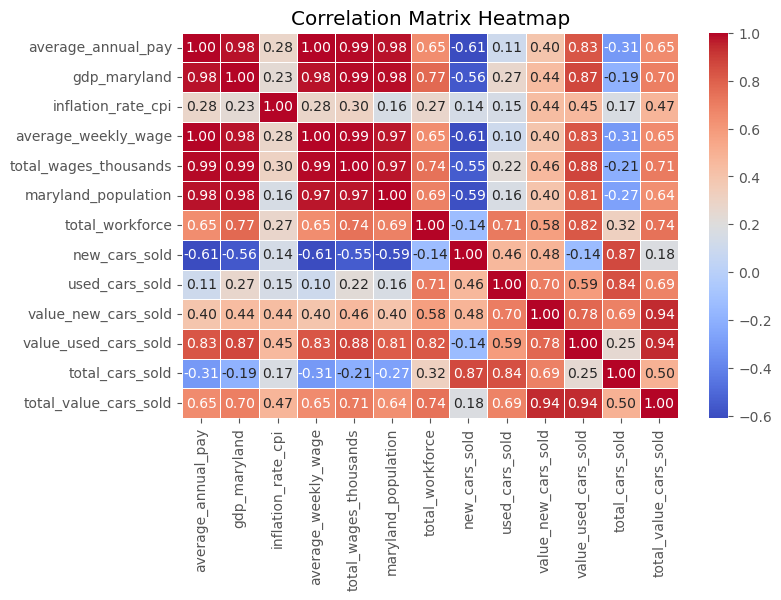

In [ ]:
#Create a correlation matrix of the variables
#There are more economic and socio economic data
plt.figure(figsize=(8,5))
yearly_matrix = yearly_data.corr()

sns.heatmap(yearly_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The yearly data from the database has more variables that can be considered. These can be included in the monthly data but it will have to be done using interpolated data which is not reflective of real life. Regardless, the correlation matrix displays that the economic factors all follow very similar trends hence most of them following at least a 0.97 correlation. 

### Comparison of New and Used Cars
As the total cars sold and value of cars sold is a combination of new cars and used cars, it is important to understand their relationship. In order to delve deeper, keep the rolling averages of new and used cars for both values and total number of cars sold.

In [ ]:
#Create yearly rolling value of cars sold
monthly_sales_expanded['yearly_rolling_total_value_cars_sold'] = yearly_rolling_total_value_cars_sold

#Create yearly rolling averages of cars and values of cars sold for new and used cars
monthly_sales_expanded['yearly_rolling_new_cars_sold'] = (monthly_sales_expanded['new_cars_sold']).rolling(12).mean()
monthly_sales_expanded['yearly_rolling_used_cars_sold'] = (monthly_sales_expanded['used_cars_sold']).rolling(12).mean()
monthly_sales_expanded['yearly_rolling_value_new_cars_sold'] = (monthly_sales_expanded['values_new_cars_sold']).rolling(12).mean()
monthly_sales_expanded['yearly_rolling_value_used_cars_sold'] = (monthly_sales_expanded['value_used_cars_sold']).rolling(12).mean()

#Create the new columns that contain the proportion of new & used cars for total number of cars sold
monthly_sales_expanded['yearly_rolling_new_proportion_total_cars'] = monthly_sales_expanded['yearly_rolling_new_cars_sold'] / monthly_sales_expanded['yearly_rolling_mean_total_cars_sold']
monthly_sales_expanded['yearly_rolling_used_proportion_total_cars'] = monthly_sales_expanded['yearly_rolling_used_cars_sold'] / monthly_sales_expanded['yearly_rolling_mean_total_cars_sold']
monthly_sales_expanded['yearly_rolling_new_proportion_value_total_cars'] = monthly_sales_expanded['yearly_rolling_value_new_cars_sold'] / monthly_sales_expanded['yearly_rolling_total_value_cars_sold']
monthly_sales_expanded['yearly_rolling_used_proportion_value_total_cars'] = monthly_sales_expanded['yearly_rolling_value_used_cars_sold'] / monthly_sales_expanded['yearly_rolling_total_value_cars_sold']

#Create normalised versions of the above
monthly_sales_expanded['normalised_yearly_rolling__new_cars'] = normalize_time_series_df('yearly_rolling_new_cars_sold',monthly_sales_expanded)
monthly_sales_expanded['normalised_yearly_rolling_used_cars'] = normalize_time_series_df('yearly_rolling_used_cars_sold',monthly_sales_expanded)
monthly_sales_expanded['normalised_yearly_rolling_new_value_cars'] = normalize_time_series_df('yearly_rolling_value_new_cars_sold',monthly_sales_expanded)
monthly_sales_expanded['normalised_yearly_rolling_used_value_cars'] = normalize_time_series_df('yearly_rolling_value_used_cars_sold',monthly_sales_expanded)

monthly_sales_expanded

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,yearly_rolling_mean_total_cars_sold,...,yearly_rolling_value_new_cars_sold,yearly_rolling_value_used_cars_sold,yearly_rolling_new_proportion_total_cars,yearly_rolling_used_proportion_total_cars,yearly_rolling_new_proportion_value_total_cars,yearly_rolling_used_proportion_value_total_cars,normalised_yearly_rolling__new_cars,normalised_yearly_rolling_used_cars,normalised_yearly_rolling_new_value_cars,normalised_yearly_rolling_used_value_cars
month,,,,,,,,,,,,,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,71871.000000,...,1.107642e+09,8.004691e+08,0.335713,0.664287,0.580491,0.419509,0.225779,0.015584,0.950623,0.926198
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,72383.166667,...,1.122790e+09,8.072109e+08,0.337116,0.662884,0.581756,0.418244,0.242659,0.030295,0.976164,0.940697
2023-09-01,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6,72219.750000,...,1.125966e+09,7.993700e+08,0.338976,0.661024,0.584815,0.415185,0.247550,0.015337,0.981520,0.923834


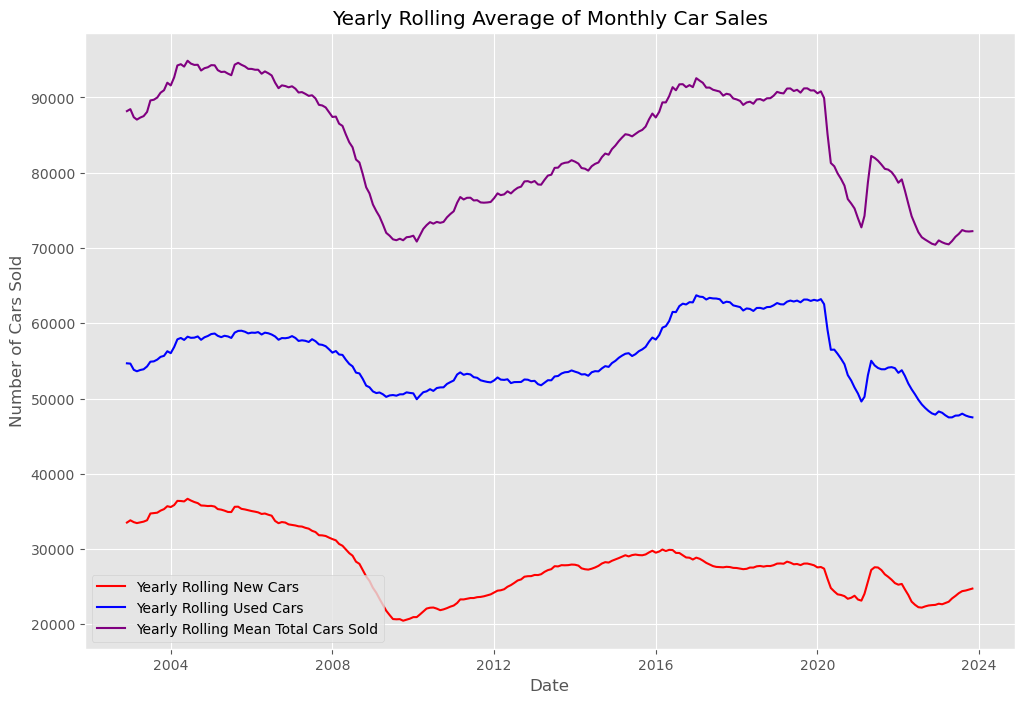

In [ ]:
#This should suggest the difference in car sales segmented on new compared to used
# Plot the data
plt.plot(monthly_sales_expanded.index, monthly_sales_expanded['yearly_rolling_new_cars_sold'], label='Yearly Rolling New Cars', color='red')
plt.plot(monthly_sales_expanded.index, monthly_sales_expanded['yearly_rolling_used_cars_sold'], label='Yearly Rolling Used Cars', color='blue')
plt.plot(monthly_sales_expanded.index, monthly_sales_expanded['yearly_rolling_mean_total_cars_sold'], label='Yearly Rolling Mean Total Cars Sold', color='purple')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Cars Sold')
plt.title('Yearly Rolling Average of Monthly Car Sales')
plt.legend()
plt.show()

If you observe the number of new cars sold compared to the number of used cars sold it can be observed that they follow very similar trends. The major difference obviously being that the number of used cars that are purchased have a higher value than the new cars sold. This movement similarity concludes the correlation matrix's value of 0.87 and 0.93 for new cars sold and used cars sold respectively. The points of difference can be observed in the graph below.

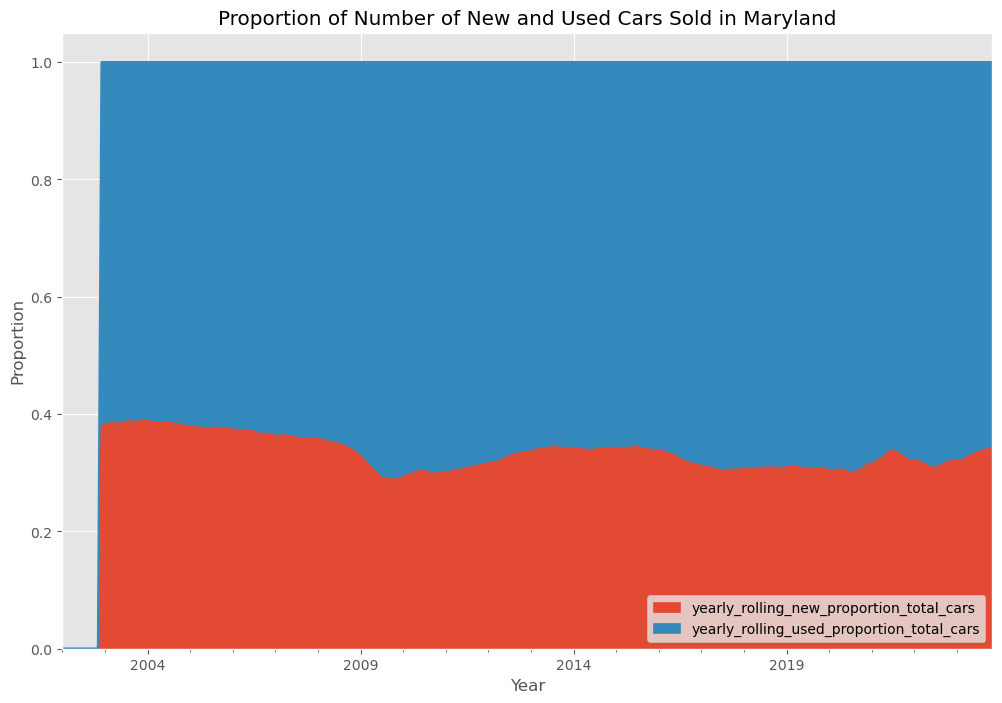

In [ ]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_sales_expanded[['yearly_rolling_new_proportion_total_cars', 'yearly_rolling_used_proportion_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.show()

There is no clear movement. It looks quite like white noise with a few periods of fluctuations. For example in 2009 the number of new cars sold dropped dramatically likely due to the decrease in economic activity. There was an increase in 2020 for the number of new cars sold which is because the price of used cars increased a lot during this period of time.

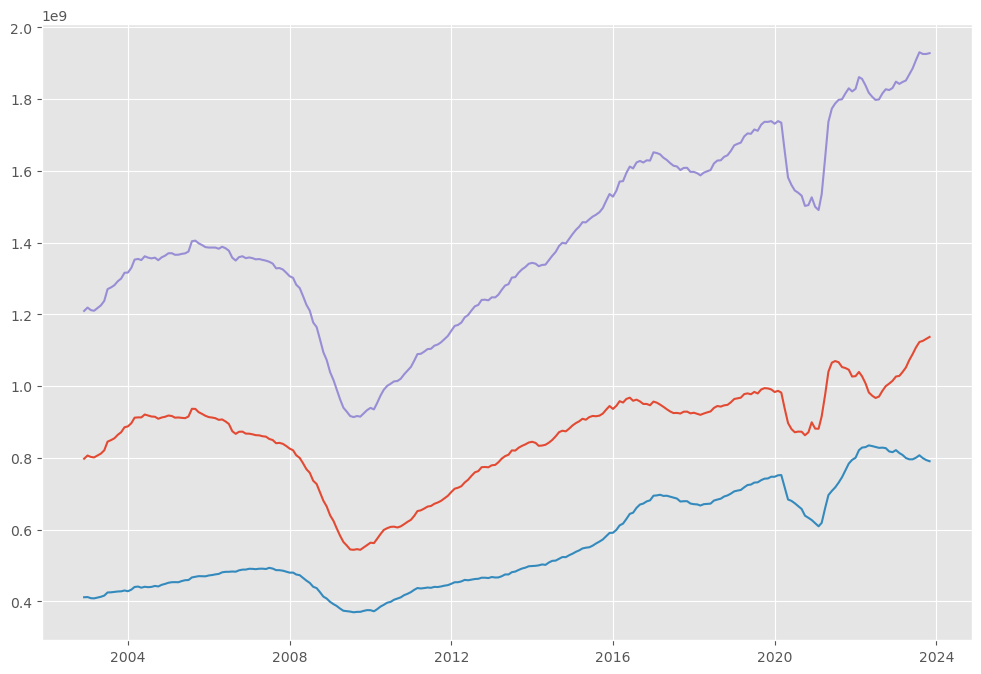

In [ ]:
plt.plot(monthly_sales_expanded.index, monthly_sales_expanded['yearly_rolling_value_new_cars_sold'])
plt.plot(monthly_sales_expanded.index,monthly_sales_expanded['yearly_rolling_value_used_cars_sold'])
plt.plot(monthly_sales.index,monthly_sales_expanded['yearly_rolling_total_value_cars_sold'])

Similar to the number of cars sold graph, there is a very similar trend in movement. This is also represented in the high correlation values as seen in the correlaiton matrix. As the number of new cars sold which are more expensive is not increasing at a faster rate than used cars the increase in value of total cars while number of cars sold is decreasing can not be explained.

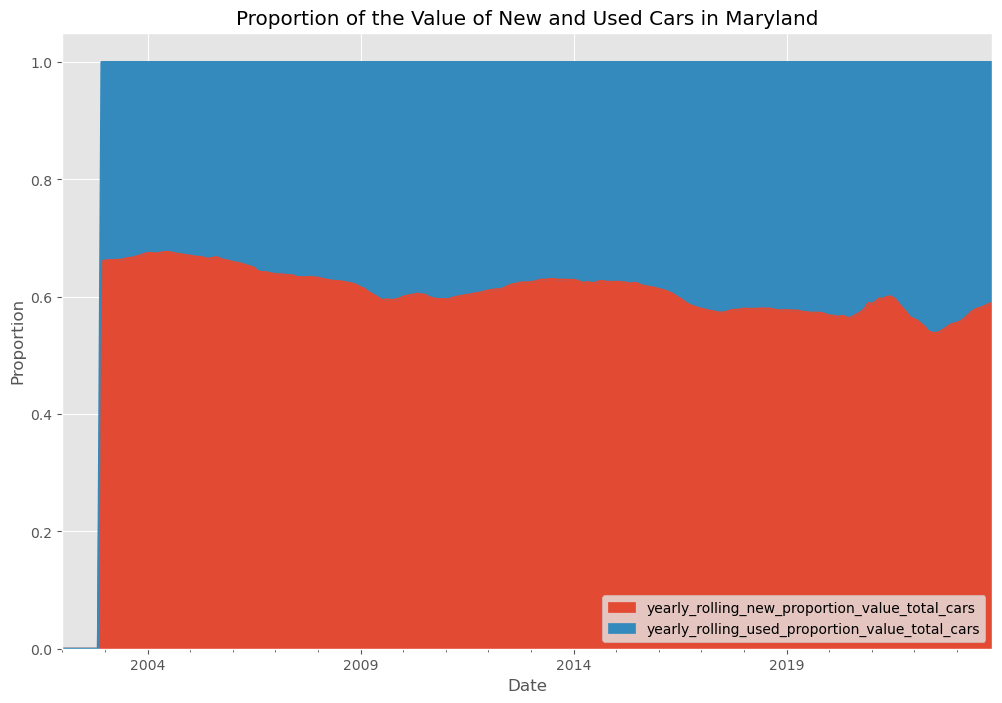

In [ ]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_sales_expanded[['yearly_rolling_new_proportion_value_total_cars', 'yearly_rolling_used_proportion_value_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of the Value of New and Used Cars in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

The value of new and used cars sold follow a very similar pattern. This is reflected well in the proportion of new vs used cars sold. When the proportions do not indicate any major changes this reflects that the pattern of new and used value of cars sold is similar. There is one period of major difference however, this is during 2020 where the value of new cars sold spiked a lot higher than the used cars sold. This is likely due to the cost of used cars increasing leading to a lot of people taking the opportunity to purchase a new car rather than used. Another difference is that the variable of used cars sold is much smaller and follows more of a linear trend from 2003 to 2023.

### Economic Data Exploration
Look at the monthly and yearly economic and socioeconomic data.

In [ ]:
yearly_data_expanded = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_economic/yearly_economic_dataset.csv')
yearly_data_expanded['Date'] = pd.to_datetime(yearly_data_expanded['Date'])
yearly_data_expanded.drop(columns='Unnamed: 0',inplace=True)
yearly_data_expanded.head(5)

,Date,Inflation Rate,Total Wages in Maryland,GDP for Maryland State,Annual Average Pay,Average Weekly Wage,Maryland Total Workforce,Population
0,2002-01-01,2.4,9.558951e+10,2.178371e+11,39382.0,757.0,2427396.0,5440389
1,2003-01-01,1.4,9.903996e+10,2.289593e+11,40686.0,782.0,2434480.0,5496269
2,2004-01-01,1.8,1.047165e+11,2.451245e+11,42579.0,819.0,2461074.0,5546935
3,2005-01-01,2.2,1.108079e+11,2.621000e+11,44368.0,853.0,2497416.0,5592379
4,2006-01-01,2.5,1.167913e+11,2.741453e+11,46162.0,888.0,2530129.0,5627367


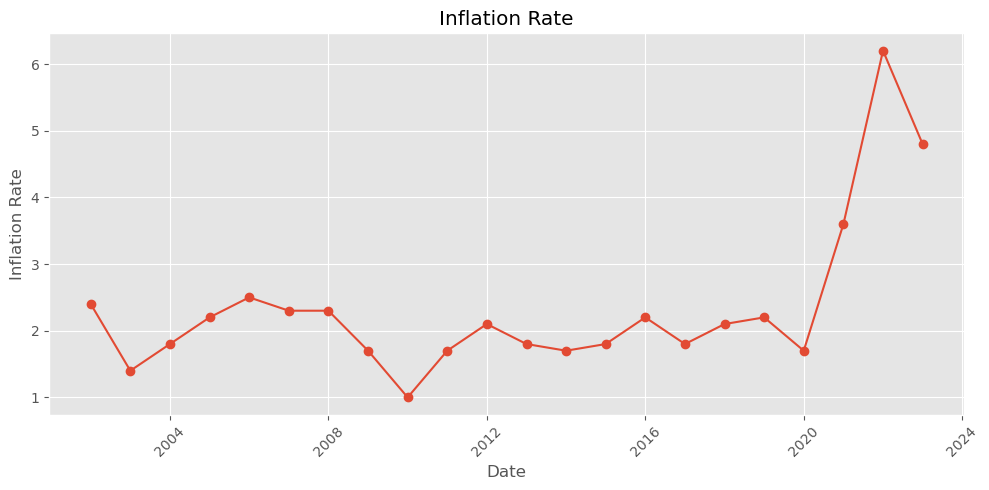

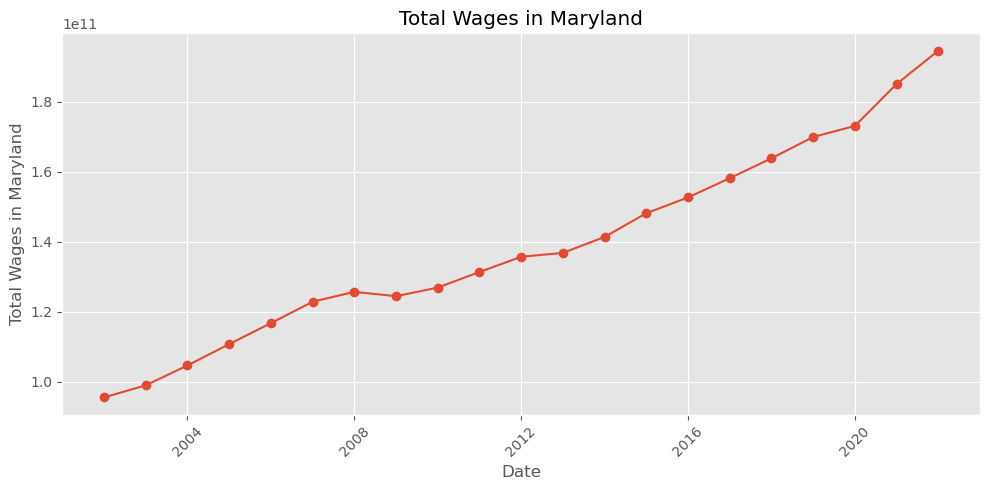

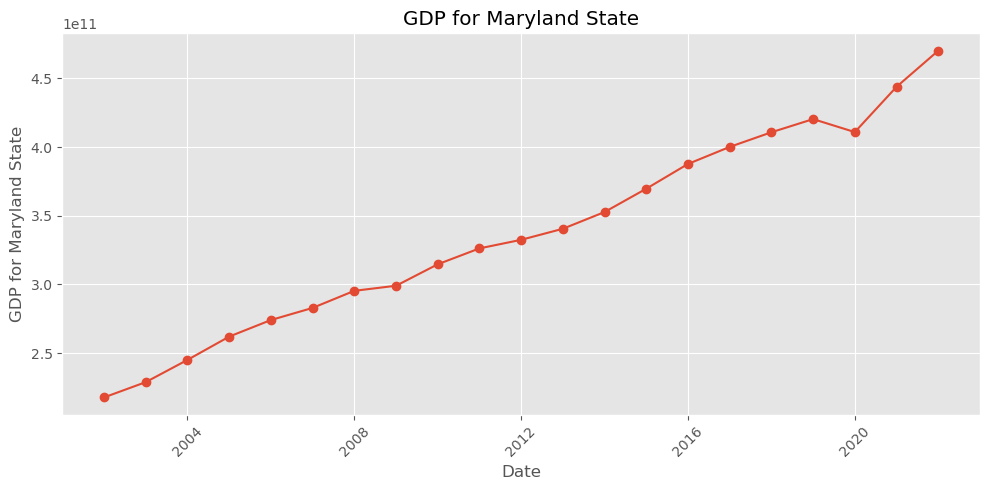

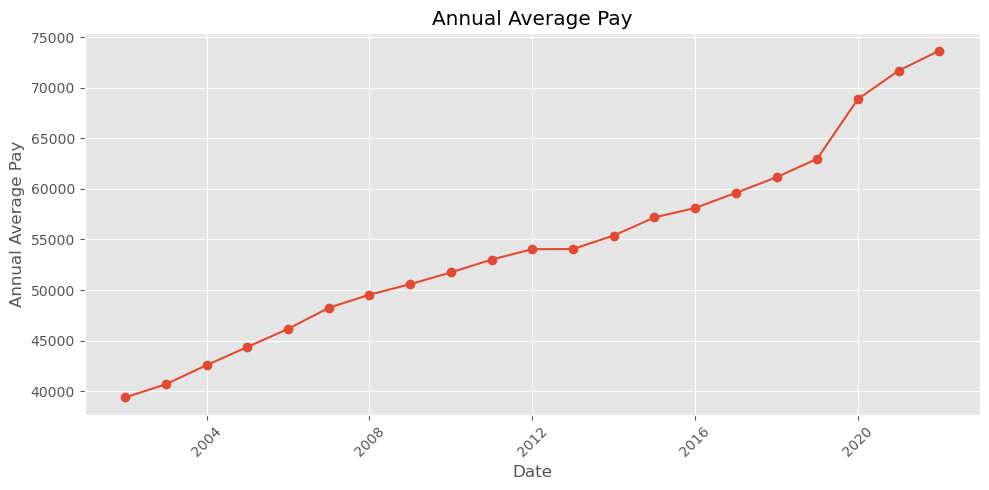

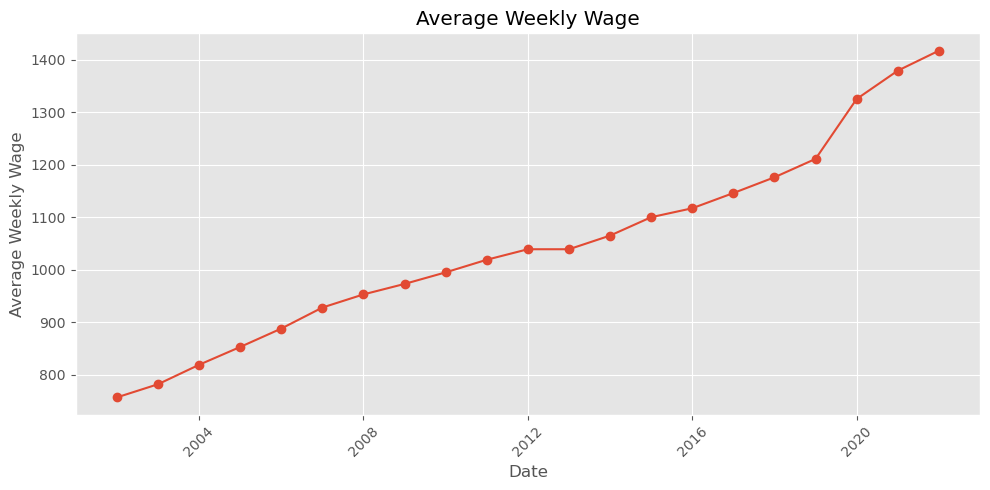

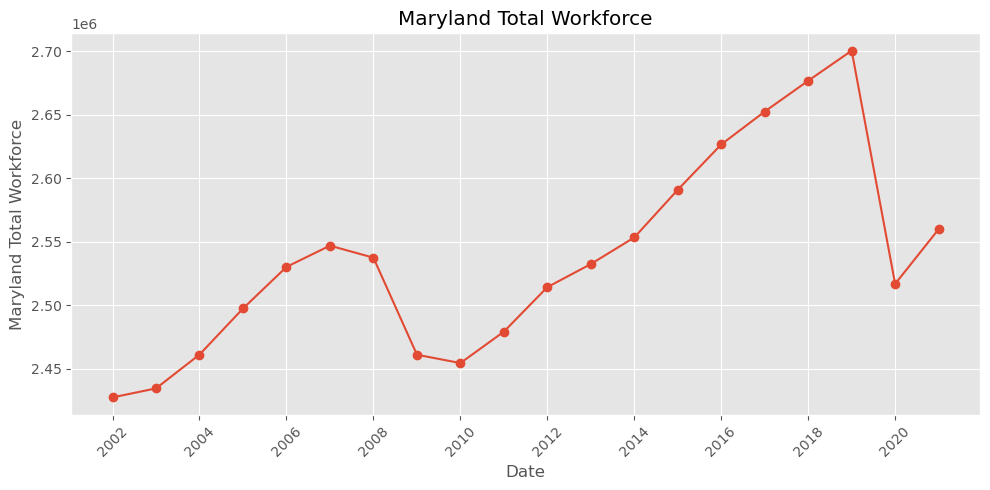

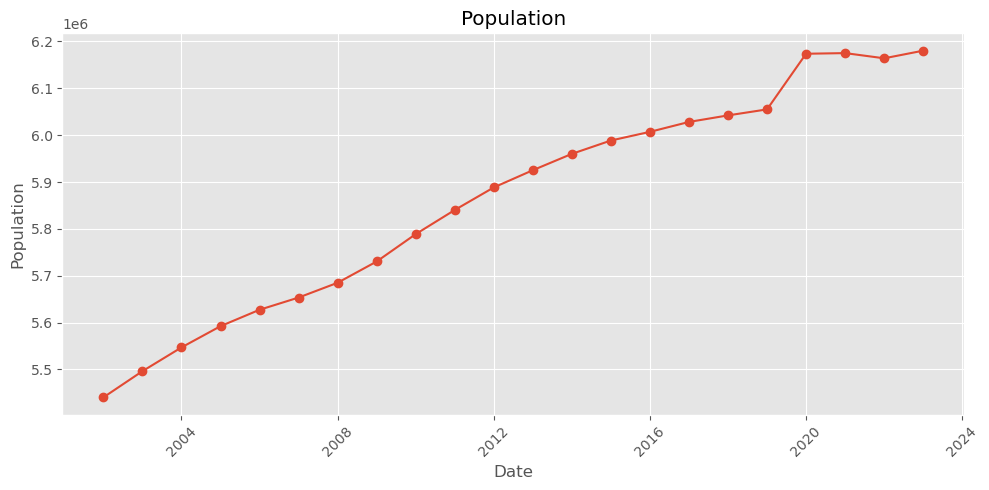

In [ ]:
for column in yearly_data_expanded.columns[1:]:  # Exclude 'Date' column
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_data_expanded['Date'], yearly_data_expanded[column], marker='o', linestyle='-')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
monthly_sales

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9
...,...,...,...,...,...,...,...,...,...
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7
2023-09-01,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6


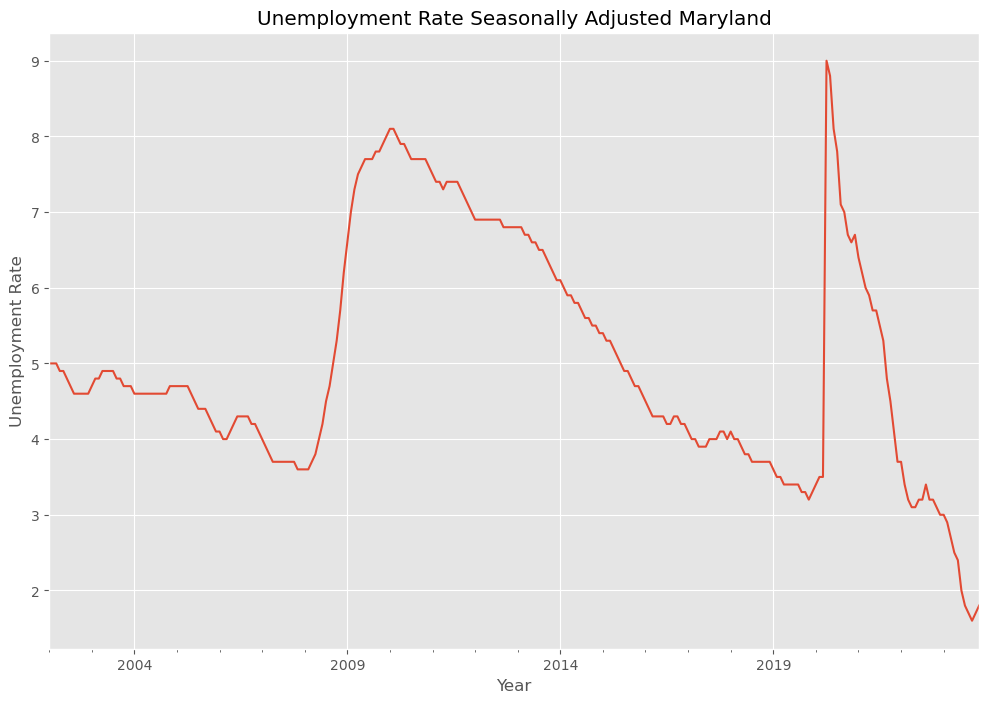

In [ ]:
line_time_series(monthly_sales.index, monthly_sales['unemployment_rate_sa'],'Unemployment Rate Seasonally Adjusted Maryland','Year','Unemployment Rate')

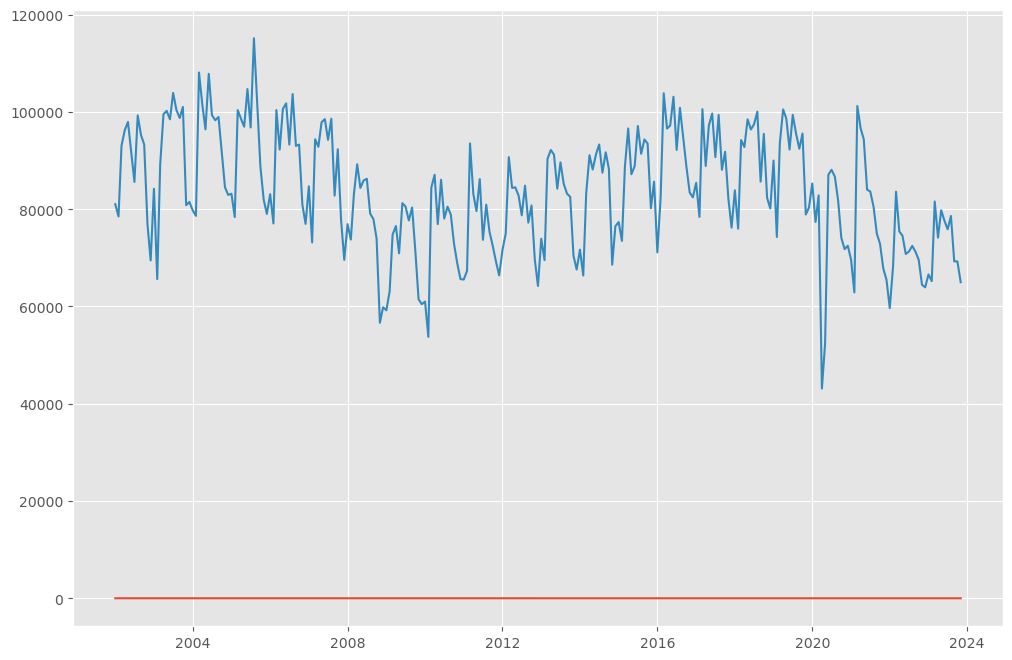

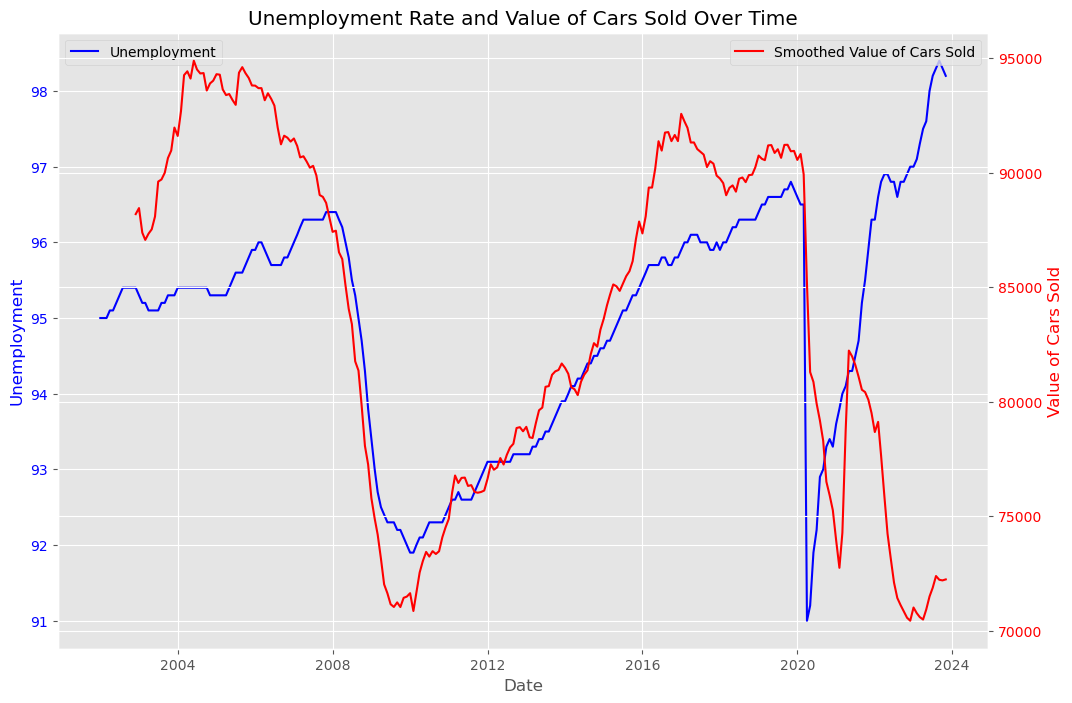

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'monthly_sales' is a DataFrame with 'unemployment_rate_sa' and 'total_cars_sold' columns

# Plotting the first variable (unemployment rate) on the primary y-axis
fig, ax1 = plt.subplots()
ax1.plot(monthly_sales.index, 100-monthly_sales['unemployment_rate_sa'], label='Unemployment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the second variable (value of cars sold)
ax2 = ax1.twinx()
ax2.plot(monthly_sales.index, monthly_sales['total_cars_sold'].rolling(12).mean(), label='Smoothed Value of Cars Sold', color='red')
ax2.set_ylabel('Value of Cars Sold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Unemployment Rate and Value of Cars Sold Over Time')
plt.show()